In [ ]:
import tensorflow as tf
from keras.models import load_model
# global graph, model, output_list
from keras.preprocessing import image
import numpy as np
import base64
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from tensorflow.keras.models import Sequential

tf.__version__



Populating the interactive namespace from numpy and matplotlib


'2.4.1'

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#tf.compat.v1.reset_default_graph()
# graph = tf.compat.v1.get_default_graph()#tf.get_default_graph()
graph = tf.Graph()
model = load_model('/content/gdrive/MyDrive/Projects/leaf identification/leaf infection farhan/AlexNetModel.hdf5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
output_dict = {'Apple___Apple_scab': 0,
               'Apple___Black_rot': 1,
               'Apple___Cedar_apple_rust': 2,
               'Apple___healthy': 3,
               'Blueberry___healthy': 4,
               'Cherry_(including_sour)___Powdery_mildew': 5,
               'Cherry_(including_sour)___healthy': 6,
               'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
               'Corn_(maize)___Common_rust_': 8,
               'Corn_(maize)___Northern_Leaf_Blight': 9,
               'Corn_(maize)___healthy': 10,
               'Grape___Black_rot': 11,
               'Grape___Esca_(Black_Measles)': 12,
               'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
               'Grape___healthy': 14,
               'Orange___Haunglongbing_(Citrus_greening)': 15,
               'Peach___Bacterial_spot': 16,
               'Peach___healthy': 17,
               'Pepper,_bell___Bacterial_spot': 18,
               'Pepper,_bell___healthy': 19,
               'Potato___Early_blight': 20,
               'Potato___Late_blight': 21,
               'Potato___healthy': 22,
               'Raspberry___healthy': 23,
               'Soybean___healthy': 24,
               'Squash___Powdery_mildew': 25,
               'Strawberry___Leaf_scorch': 26,
               'Strawberry___healthy': 27,
               'Tomato___Bacterial_spot': 28,
               'Tomato___Early_blight': 29,
               'Tomato___Late_blight': 30,
               'Tomato___Leaf_Mold': 31,
               'Tomato___Septoria_leaf_spot': 32,
               'Tomato___Spider_mites Two-spotted_spider_mite': 33,
               'Tomato___Target_Spot': 34,
               'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35,
               'Tomato___Tomato_mosaic_virus': 36,
               'Tomato___healthy': 37}

output_list = list(output_dict.keys())

from rest_framework import serializers

class ImageSerializer(serializers.Serializer):
    photo = serializers.ImageField(help_text='Image of a leaf')
settings.configure()

In [ ]:
def index(request):
    with open(request, "rb") as img_file:
        b64_img = base64.b64encode(img_file.read()).decode('ascii')
    
    img = image.load_img(request, target_size=(224, 224))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    # with graph.as_default():
    prediction = model.predict(img)

    prediction_flatten = prediction.flatten()
    max_val_index = np.argmax(prediction_flatten)
    result = output_list[max_val_index]
    img=mpimg.imread(request)
    imgplot = plt.imshow(img)
    plt.show()
    return result


In [ ]:
class Predict():
    def post(request):
        """
            post:
            API to send leaf image and get its health status or disease.
        """
        if data.is_valid():
            img = image.load_img(photo, target_size=(224, 224))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            img = img/255

            # with graph.as_default():
            prediction = model.predict(img)

            prediction_flatten = prediction.flatten()
            max_val_index = np.argmax(prediction_flatten)
            result = output_list[max_val_index]

            return result


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!ls

 sample_data  'Screenshot (6).png'


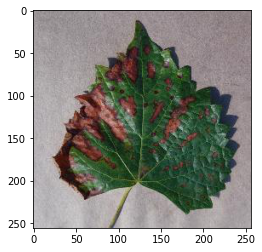

'Grape___Esca_(Black_Measles)'

In [ ]:
path='/content/01162551-b800-4df8-ac46-64d17d6ac5bf___FAM_B.Msls 1153.JPG'
index(path)